# 18.085 Final Project

## Nicholas Belsten & Hannah Tomio
PCA and CVM for Fault Detection onboard Satellites

In [4]:
#load the data
using CSV
using DataFrames

fault_data = CSV.read("data\fault_quickscat.csv", DataFrame)

LoadError: ArgumentError: Package DataFrames not found in current path.
- Run `import Pkg; Pkg.add("DataFrames")` to install the DataFrames package.

In [5]:
import Pkg; Pkg.add("DataFrames")

   Resolving package versions...
   Installed InvertedIndices ──── v1.3.0
   Installed Crayons ──────────── v4.1.1
   Installed StringManipulation ─ v0.3.0
   Installed DataFrames ───────── v1.5.0
   Installed PrettyTables ─────── v2.2.4
    Updating `C:\Users\nickb\.julia\environments\v1.8\Project.toml`
  [a93c6f00] + DataFrames v1.5.0
    Updating `C:\Users\nickb\.julia\environments\v1.8\Manifest.toml`
  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.5.0
  [41ab1584] + InvertedIndices v1.3.0
  [08abe8d2] + PrettyTables v2.2.4
  [892a3eda] + StringManipulation v0.3.0
Precompiling project...
  ✓ InvertedIndices
  ✓ Crayons
  ✓ StringManipulation
  ✓ PrettyTables
  ✓ DataFrames
  5 dependencies successfully precompiled in 33 seconds. 235 already precompiled. 2 skipped during auto due to previous errors.


4384×5 Matrix{Any}:
 "Date"            "Consumption"     "Wind"    "Solar"     "Wind+Solar"
 "2006-01-01"  1069.18               ""        ""          ""
 "2006-01-02"  1380.52               ""        ""          ""
 "2006-01-03"  1442.53               ""        ""          ""
 "2006-01-04"  1457.22               ""        ""          ""
 "2006-01-05"  1477.13               ""        ""          ""
 "2006-01-06"  1403.43               ""        ""          ""
 "2006-01-07"  1300.29               ""        ""          ""
 "2006-01-08"  1207.98               ""        ""          ""
 "2006-01-09"  1529.32               ""        ""          ""
 "2006-01-10"  1576.91               ""        ""          ""
 "2006-01-11"  1577.18               ""        ""          ""
 "2006-01-12"  1553.28               ""        ""          ""
 ⋮                                                      
 "2017-12-20"  1559.69             90.88      8.799      99.679
 "2017-12-21"  1520.37            259.039  

summary(days) = "4383-element Vector{Int64}"
summary(consumption) = "4383-element Vector{Float64}"


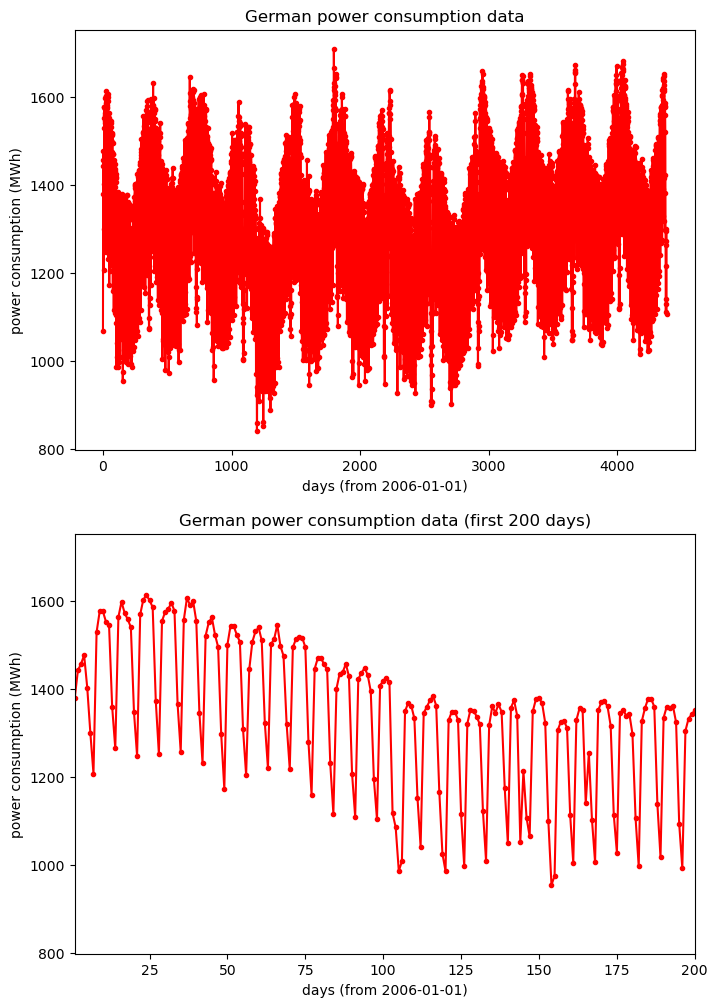

(1.0, 200.0)

In [3]:
# extract the data and plot it:

using DelimitedFiles, Dates
data = readdlm(datafile, ',')
display(data)
dates = parse.(Date, data[2:end, 1])
days = Dates.value.(dates .- dates[1])
consumption = Float64.(data[2:end, 2])
@show summary(days)
@show summary(consumption)

using PyPlot

figure(figsize=(8,12))
subplot(2,1,1)
title("German power consumption data")
plot(days, consumption, "r.-")
xlabel("days (from 2006-01-01)")
ylabel("power consumption (MWh)")

subplot(2,1,2)
title("German power consumption data (first 200 days)")
plot(days, consumption, "r.-")
xlabel("days (from 2006-01-01)")
ylabel("power consumption (MWh)")
xlim(1,200)

In [ ]:
# fill in the ??? to get A and b from x and m
function autoregressive_model(x, M)
    N = length(x)
    A = similar(x, ???, ???) # ??? x ??? matrix of same type as x
    for i = 1:size(A,1) # fill in A row-by row
        t = M-1+i
        A[i,:] = x[???:???] # hint: each row of A comes from a slice of x
    end
    b = ???
    return A, b
end

training_data = consumption[1:end-100]

# construct your A and b from M=8 and find β
M = 8
A, b = autoregressive_model(training_data[1:end-100], M)
β = A \ b # least-square fit

In [ ]:
# test data from last 100+M points:
test_data = consumption[end-99-M:end]

# plot the predictions for the last 100 points along with test data
predictions = ???
plot(predictions, "ro-")
plot(test_data[end-99:end], "b*-")

## Problem 6

Show that the pseudo-inverse $A^+$ obeys $AA^+A=A$ and $A^+ A A^+ = A^+$.

## Problem 7

In this problem you will use **principal components analysis (PCA)** and the SVD to classify a images.

The code below downloads a [collection of 80 monochrome/grayscale drawings](https://math.mit.edu/~stevenj/snow.zip) of [snowpeople](https://en.wikipedia.org/wiki/Snowman) and [snowflakes](https://en.wikipedia.org/wiki/Snowflake) found by a google image search in Spring 2023, shown in miniature here:

![image.png](attachment:image.png)

Each image is resized to a common size of $156 \times 128$, and then reshaped into a vector of $156\times 156 = 19968$ numbers (the grayscale intensity of each pixel), and stored in a matrix $X$ of "measurements" for 80 images:
$$
X = 19968 \times 80 \mbox{ matrix} = \mbox{(data per image)} \times \mbox{(# images)}
$$
Think of this as 80 points in a **19968-dimensional space**, i.e. each image is a point in $\mathbb{R}^{19968}$!!

PCA allows us to figure out which combinations of these 19968 variables explain most of the variations, and allows us to *project* from $\mathbb{R}^{19968}$ to a *much* lower-dimensional space in order to help us *classify* the data and identify *clusters* of similar images.   In this problem (parts a and b, below), you will perform the PCA clustering analysis yourself.

You will need to install some Julia packages to help extract the image data.  
```jl
import Pkg
Pkg.add("ZipFile")
Pkg.add("Images")
Pkg.add("FileIO")
```
(or type `] add ZipFile Images FileIO`).

You can then run the following code to download the data and reshape it into our $X$ matrix:

In [1]:
using ZipFile, Images, FileIO, Statistics, LinearAlgebra, PyPlot

# download the files as a zip archive:
imagezip = download("https://math.mit.edu/~stevenj/snow.zip")

"/var/folders/q9/2vfl1wt51558xwpl4nv4wt580000gn/T/jl_aH2TS1Y9Mx"

In [ ]:
rows, cols = 156,128  # common size to resize all of the images to

# extract the images from the zip file, load them, resize them, and stick them into a big array Xdata
Xdata = Float64[]
r = ZipFile.Reader(imagezip)
for f in r.files
    # load image and rescale to rows x cols
    image = imresize(load(IOBuffer(read(f))), rows, cols)
    imagedata = Float64.(channelview(image))
    if length(imagedata) == rows*cols # grayscale
        # convert to RGB
        bw = vec(imagedata)
        imagedata = permutedims([bw bw bw])
    elseif size(imagedata, 1) == 4 # RGBA
        α = reshape(imagedata[4, :, :], 1, rows, cols) # alpha (transparency)
        # convert to RGB, with transparent pixels converted to white:
        imagedata = imagedata[1:3, :, :] .* α .+ (1 .- α)
    end
    # convert back to grayscale (average RGB channels) and collect in Xdata
    append!(Xdata, reshape(mean(imagedata, dims=1), rows, cols))
end

# array of file names, and indices of snowflakes vs snowpeople
names = [f.name for f in r.files]
snowperson_indices = findall(startswith("s"), names)
snowflake_indices = findall(startswith("f"), names)

# reshape into 19968x80 matrix X
X = reshape(Xdata, :, length(r.files)) # reshape to (imagesize) x (numimages) matrix
@show size(X)

# a useful function to reshape a vector into a BW image and plot it
function plotimg(imgdata, rows=rows, cols=cols)
    u = copy(imgdata)
    u .-= minimum(u)
    u ./= maximum(u)
    imshow(reshape(u, rows, cols), cmap="gray")
    axis("off")
end

In [ ]:
# first, let's plot all of the images to make sure they look okay:
figure(figsize=(6.3, 3.15))
r, c = 7, 14
for i = 1:r, j=1:c
    k = (i-1)*c + j
    k > size(X,2) && break
    subplot(r, c, k)
    plotimg(X[:,k])
end

**(a)** Fill in the code below to compute the matrix `A` with the *mean of each pixel* (over all images) subtracted, and take its SVD to plot the singular values.

(Be careful: some treatments of PCA put the different samples in the rows of $X$ and $A$, and some put the samples in the columns.  Which are we doing here?)

In [ ]:
A = ??? # subtract means from X

U, σ, V = svd(A);

plot(σ, "b.-")
title("Problem 7(a): Singular values of A");
xlabel(L"k");
legend([L"\sigma_k"]);

**(b)** Compute the projections `c1[i]` and `c2[i]` of each image
onto the dominant two principal components (vectors u or v in this case?).  That is, reduce the 19968-dimensional data to **2 dimensions**.

(Does it matter much whether you do the projection to the images in $A$ or $X$?  Why or why not?)

Run the code below to plot `c2` vs `c1` for every image, coloring the points corresponding to snowpeople blue and the points corresponding to snowflakes red.  Hopefully, in this 2d projection, you will see
different types of images separated into mostly distinct coordinate regions, with similar images clustered together.

In [ ]:
c1 = ???
c2 = ???

In [ ]:
figure(figsize=(20,15))
plot(c1[snowperson_indices], c2[snowperson_indices], "b.")
plot(c1[snowflake_indices], c2[snowflake_indices], "r.")
text.(c1, c2, string.(1:length(c1)), fontsize=12);

title("Problem 7(b): Compressed data, visualized on a plane", fontsize=20);
xlabel(L"$c_1$", fontsize=20);
ylabel(L"$c_2$", fontsize=20);